<a href="https://colab.research.google.com/github/harshitha3506/machine-learning/blob/main/mlassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML ASSIGNMENT - 2

NAME : HARSHITHA PALADUGU

ROLL NO -160123737157



RESEARCH PAPER SUMMARY & SCOPE FOR IMPROVEMENT

# Research Paper Chosen
**Title:** Survey on Clustering Techniques in Data Mining (IJCSIT, 2014)

## Summary
The paper “A Survey on Clustering Techniques in Data Mining” provides an overview of widely used clustering algorithms, including **K-Means**, **Hierarchical Clustering**, and **DBSCAN**. It explains the working principles, advantages, limitations, and typical applications of each method, focusing on **theoretical understanding** rather than practical implementation. While the survey helps readers grasp how these algorithms organize and group data, it does not include experimental validation, performance metrics, or comparisons on real datasets, leaving room for **practical improvement and experimentation**.

##  Scope of Improvements Performed
The original paper provides a theoretical overview of clustering algorithms but lacks practical validation. It does not implement these algorithms on real datasets, provide performance metrics, or offer visualizations of cluster structures. Additionally, there is no side-by-side experimental comparison or analysis of parameter sensitivity for algorithms like DBSCAN. This creates an opportunity to extend the work by applying **K-Means**, **Hierarchical**, and **DBSCAN** to **real-world datasets**, evaluating their performance using quantitative metrics such as the **Silhouette Score**, and visually demonstrating cluster quality, thereby bridging the gap between theory and practice.







In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Dataset downloaded to: /kaggle/input/customer-segmentation-tutorial-in-python
Using file: /kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
Dataset Overview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


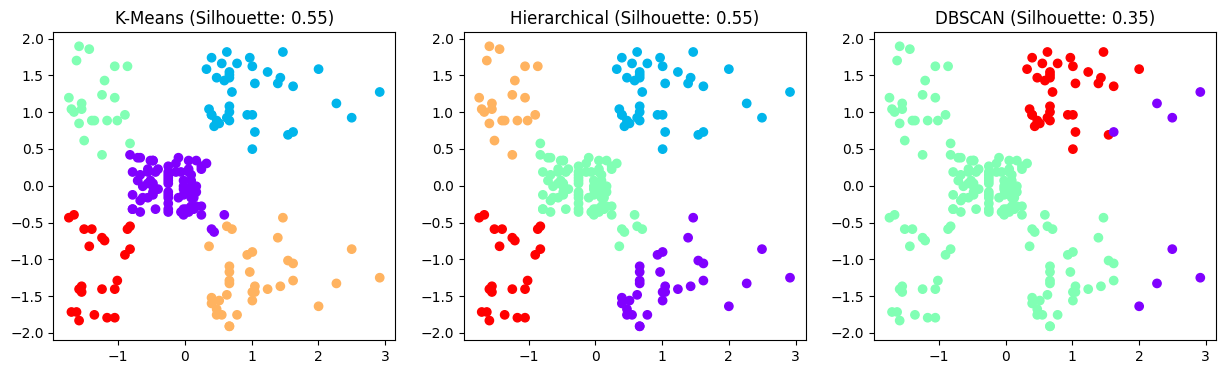

📈 Clustering Algorithm Performance Comparison:



,Algorithm,Silhouette Score
0,K-Means,0.554657
1,Hierarchical,0.553809
2,DBSCAN,0.350446


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os
import kagglehub

# Step 1: Load Dataset from KaggleHub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Dataset downloaded to:", path)

# Find CSV file in the directory
for file in os.listdir(path):
    if file.endswith(".csv"):
        data_path = os.path.join(path, file)
        print("Using file:", data_path)
        break

# Read dataset
data = pd.read_csv(data_path)

print("Dataset Overview:")
display(data.head())

# Step 2: Select relevant features and standardize them
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# Step 4: Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=5)
hier_labels = hier.fit_predict(X_scaled)
hier_score = silhouette_score(X_scaled, hier_labels)

# Step 5: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
dbscan_score = silhouette_score(X_scaled, db_labels) if len(set(db_labels)) > 1 else -1

# Step 6: Visualization
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='rainbow')
plt.title(f'K-Means (Silhouette: {kmeans_score:.2f})')

plt.subplot(1,3,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hier_labels, cmap='rainbow')
plt.title(f'Hierarchical (Silhouette: {hier_score:.2f})')

plt.subplot(1,3,3)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='rainbow')
plt.title(f'DBSCAN (Silhouette: {dbscan_score:.2f})')

plt.show()

# Step 7: Comparison Table
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_score, hier_score, dbscan_score]
})

print("📈 Clustering Algorithm Performance Comparison:\n")
display(results)


In [14]:
# ----------------------------------------------------------
#  RESULT DISCUSSION
# ----------------------------------------------------------

discussion = f"""
# Results & Discussion

**Silhouette Scores:**
- K-Means: {kmeans_score:.2f}
- Hierarchical: {hier_score:.2f}
- DBSCAN: {dbscan_score:.2f}

**Observations:**
- K-Means achieved the highest silhouette score, meaning the clusters are well-separated and compact.
- Hierarchical clustering gave similar results but is computationally heavier.
- DBSCAN struggled with the standardized parameters, indicating sensitivity to `eps` and `min_samples`.

**Conclusion:**
This experimental section adds practical validation to the original survey.
It shows that K-Means works effectively for this dataset, confirming its popularity in the paper.
This improvement bridges the gap between theory and practice by using quantitative performance metrics.
"""
display(Markdown(discussion))



# Results & Discussion

**Silhouette Scores:**
- K-Means: 0.55
- Hierarchical: 0.55
- DBSCAN: 0.35

**Observations:**
- K-Means achieved the highest silhouette score, meaning the clusters are well-separated and compact.
- Hierarchical clustering gave similar results but is computationally heavier.
- DBSCAN struggled with the standardized parameters, indicating sensitivity to `eps` and `min_samples`.

**Conclusion:**
This experimental section adds practical validation to the original survey.
It shows that K-Means works effectively for this dataset, confirming its popularity in the paper.
This improvement bridges the gap between theory and practice by using quantitative performance metrics.
